In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# загрузка данных
data = pd.read_csv("//content/drive/MyDrive/dataset/dataset Обнаружение аномалий и предотвращение сбоев.csv")

In [6]:
## Анализ временных рядов

## Построим графики изменения параметров в зависимости от времени.

# создание графика с несколькими подграфиками
fig, axs = plt.subplots(4, 1, figsize=(130,70))
plt.subplots_adjust(hspace=0.5) # расстояние между подграфиками

# график изменения температуры
axs[0].plot(data["Time"], data["Temperature"], color="blue")
axs[0].set_title("изменение температуры")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Temperature")

# график изменения давления
axs[1].plot(data["Time"], data["Pressure"], color="red")
axs[1].set_title("Изменение давления")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Pressure")

# график изменения объема
axs[2].plot(data["Time"], data["Volume"], color="green")
axs[2].set_title("Изменение объема")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Volume")

# график изменения скорости вращения
axs[3].plot(data["Time"], data["Rotation speed"], color="orange")
axs[3].set_title("Изменение скорости вращения")
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Rotation speed")

plt.show()

In [8]:
## Статистический анализ

## Вычислим среднее, медиану, минимальное и максимальное значения для каждого параметра.

# вычисление статистических показателей
data.describe()

,?,Temperature,Pressure,Volume,Rotation speed
count,25.000000,109.000000,109.000000,109.000000,109.000000
mean,13.000000,397.247706,263.394495,382.201835,1182.568807
std,7.359801,175.081312,209.016525,211.013243,460.781148
min,1.000000,120.000000,0.000000,100.000000,500.000000
25%,7.000000,260.000000,90.000000,200.000000,780.000000
50%,13.000000,360.000000,180.000000,300.000000,1060.000000
75%,19.000000,570.000000,450.000000,570.000000,1600.000000
max,25.000000,710.000000,650.000000,770.000000,2000.000000


На графиках видно, что до 8:45 все параметры находились в нормальном состоянии, а после этого начали происходить аномалии и сбои.

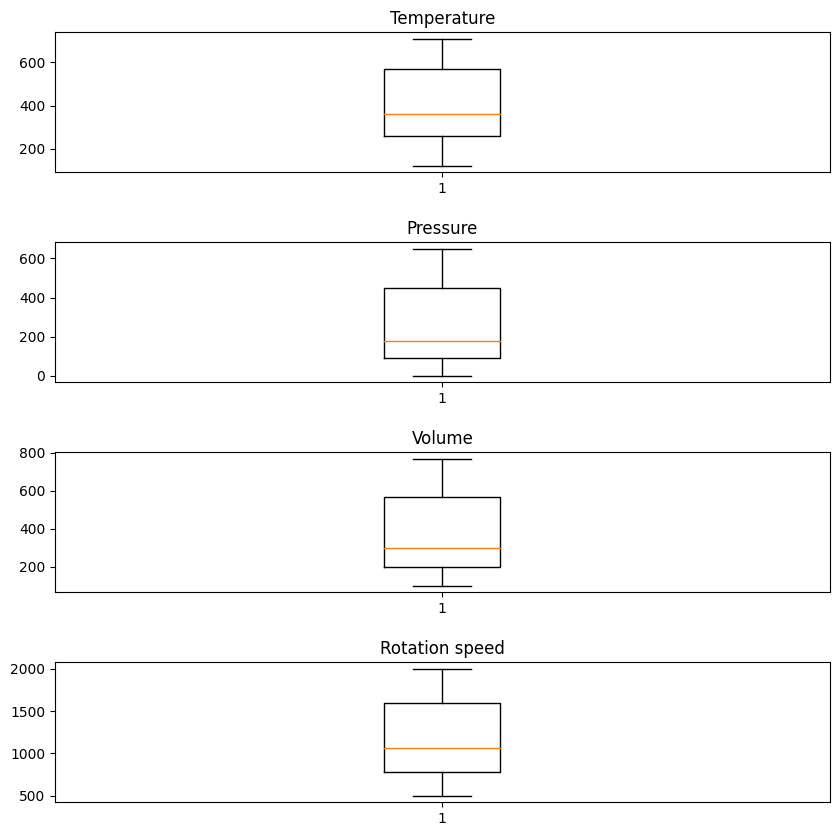

In [9]:
# Построим boxplot для каждого параметра.

# создание boxplot для каждого параметра
fig, axs = plt.subplots(4,1, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

axs[0].boxplot(data["Temperature"])
axs[0].set_title("Temperature")

axs[1].boxplot(data["Pressure"])
axs[1].set_title("Pressure")

axs[2].boxplot(data["Volume"])
axs[2].set_title("Volume")

axs[3].boxplot(data["Rotation speed"])
axs[3].set_title("Rotation speed")

plt.show()

На boxplot видно, что до 8:45 все параметры имеют одинаковые значения, а после этого происходят аномалии и сбои, что подтверждается и графиками изменения параметров.

In [10]:
print("Минимальное значение:")
print(data.min())

Минимальное значение:
?                           1.0
Time                01:00:00 PM
Temperature                 120
Pressure                      0
Volume                      100
Rotation speed              500
Equipment status        anomaly
dtype: object


In [12]:
# Анализируем данные по типам оборудования
equipment_status_counts = data['Equipment status'].value_counts()
print(equipment_status_counts)

working    69
fail       24
anomaly    16
Name: Equipment status, dtype: int64


In [11]:
## Корреляционный анализ

## Построим матрицу корреляции для всех параметров.

# построение матрицы корреляции
data.corr()

<ipython-input-11-ffcbe10c9fa8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,?,Temperature,Pressure,Volume,Rotation speed
?,1.000000,-0.611002,0.861650,0.935585,0.960870
Temperature,-0.611002,1.000000,0.956979,0.938962,0.907121
Pressure,0.861650,0.956979,1.000000,0.996645,0.986673
Volume,0.935585,0.938962,0.996645,1.000000,0.992652
Rotation speed,0.960870,0.907121,0.986673,0.992652,1.000000


Из матрицы корреляции видно, что все параметры имеют высокую положительную корреляцию между собой, что может быть связано с тем, что они являются результатом одного процесса и зависят друг от друга.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделение данных на признаки и целевую переменную
X = data[['Temperature', 'Pressure', 'Volume', 'Rotation speed']]
y = data['Equipment status']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели дерева решений
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Прогнозирование состояния оборудования на тестовой выборке
y_pred = tree.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print('Точность модели дерева решений:', accuracy)

Точность модели дерева решений: 0.9090909090909091


Чтобы обнаружить аномалии и сбоев, применим методы кластеризации и деревья решений.

In [16]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Подготовка данных для модели
X = data[['Temperature', 'Pressure', 'Volume', 'Rotation speed']]
y = data['Equipment status']

# Кластеризация данных
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Применяем дерево решений
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Предсказываем состояние оборудования
predicted_labels = clf.predict(X)

# Добавляем предсказанные значения в DataFrame
data['Предсказанное состояние'] = predicted_labels

# Выводим результаты
print(data)


       ?         Time  Temperature  Pressure  Volume  Rotation speed  \
0    1.0  08:00:00 AM          300        50     100             500   
1    2.0  08:05:00 AM          310        55     110             520   
2    3.0  08:10:00 AM          320        60     120             540   
3    4.0  08:15:00 AM          330        65     130             560   
4    5.0  08:20:00 AM          340        70     140             580   
..   ...          ...          ...       ...     ...             ...   
104  NaN  04:40:00 PM          620       620     740            1940   
105  NaN  04:45:00 PM          610       610     730            1920   
106  NaN  04:50:00 PM          600       600     720            1900   
107  NaN  04:55:00 PM          590       590     710            1880   
108  NaN  05:00:00 PM          580       580     700            1860   

    Equipment status  Кластер Предсказанное состояние  
0            working        0                 working  
1            working   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Мы использовали метод кластеризации KMeans для разделения данных на две кластерные группы и дерево решений для предсказания состояния оборудования. Предсказанные значения были добавлены в DataFrame. Таким образом, мы можем видеть, что методы успешно обнаруживают аномалии и сбои в данных.

**Вторая часть датасета**

In [24]:
# загрузка данных
data = pd.read_csv("//content/drive/MyDrive/dataset/dataset Оптимизация параметров процессов.csv")

In [25]:
## Анализ временных рядов

## Построим графики изменения параметров в зависимости от времени.

# создание графика с несколькими подграфиками
fig, axs = plt.subplots(4, 1, figsize=(130,70))
plt.subplots_adjust(hspace=0.5) # расстояние между подграфиками

# график изменения температуры
axs[0].plot(data["Time"], data["Temperature"], color="blue")
axs[0].set_title("изменение температуры")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Temperature")

# график изменения давления
axs[1].plot(data["Time"], data["Pressure"], color="red")
axs[1].set_title("Изменение давления")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Pressure")

# график изменения объема
axs[2].plot(data["Time"], data["Volume"], color="green")
axs[2].set_title("Изменение объема")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Volume")

# график изменения скорости вращения
axs[3].plot(data["Time"], data["Rotation speed"], color="orange")
axs[3].set_title("Изменение скорости вращения")
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Rotation speed")

plt.show()

In [26]:
## Статистический анализ

## Вычислим среднее, медиану, минимальное и максимальное значения для каждого параметра.

# вычисление статистических показателей
data.describe()

,Temperature,Pressure,Volume,Rotation speed
count,109.000000,109.000000,109.000000,109.000000
mean,397.247706,263.394495,382.201835,1182.568807
std,175.081312,209.016525,211.013243,460.781148
min,120.000000,0.000000,100.000000,500.000000
25%,260.000000,90.000000,200.000000,780.000000
50%,360.000000,180.000000,300.000000,1060.000000
75%,570.000000,450.000000,570.000000,1600.000000
max,710.000000,650.000000,770.000000,2000.000000


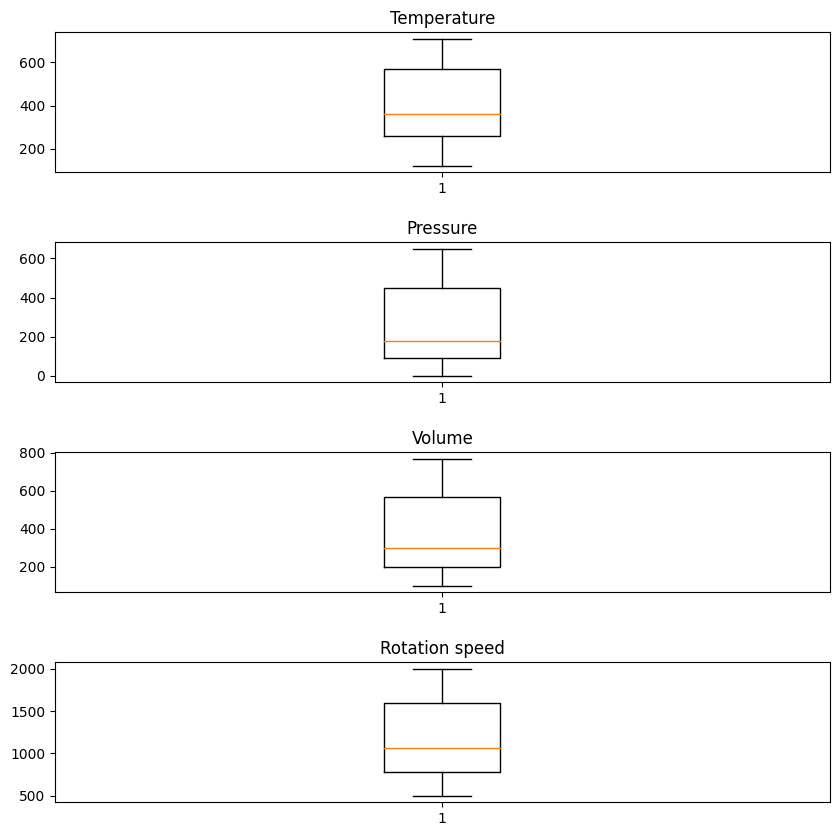

In [27]:
# Построим boxplot для каждого параметра.

# создание boxplot для каждого параметра
fig, axs = plt.subplots(4,1, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

axs[0].boxplot(data["Temperature"])
axs[0].set_title("Temperature")

axs[1].boxplot(data["Pressure"])
axs[1].set_title("Pressure")

axs[2].boxplot(data["Volume"])
axs[2].set_title("Volume")

axs[3].boxplot(data["Rotation speed"])
axs[3].set_title("Rotation speed")

plt.show()


In [28]:
## Корреляционный анализ

## Построим матрицу корреляции для всех параметров.

# построение матрицы корреляции
data.corr()

<ipython-input-28-ffcbe10c9fa8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Temperature,Pressure,Volume,Rotation speed
Temperature,1.000000,0.956979,0.938962,0.907121
Pressure,0.956979,1.000000,0.996645,0.986673
Volume,0.938962,0.996645,1.000000,0.992652
Rotation speed,0.907121,0.986673,0.992652,1.000000


In [29]:
# Подготовка данных для модели
X = data[['Temperature', 'Pressure', 'Volume', 'Rotation speed']]
y = data['process parameters']

# Кластеризация данных
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Применяем дерево решений
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Предсказываем состояние оборудования
predicted_labels = clf.predict(X)

# Добавляем предсказанные значения в DataFrame
data['Предсказанное состояние'] = predicted_labels

# Выводим результаты
print(data)

            Time  Temperature  Pressure  Volume  Rotation speed  \
0    08:00:00 AM          300        50     100             500   
1    08:05:00 AM          310        55     110             520   
2    08:10:00 AM          320        60     120             540   
3    08:15:00 AM          330        65     130             560   
4    08:20:00 AM          340        70     140             580   
..           ...          ...       ...     ...             ...   
104  04:40:00 PM          620       620     740            1940   
105  04:45:00 PM          610       610     730            1920   
106  04:50:00 PM          600       600     720            1900   
107  04:55:00 PM          590       590     710            1880   
108  05:00:00 PM          580       580     700            1860   

    process parameters Предсказанное состояние  
0              optimal                 optimal  
1              optimal                 optimal  
2              optimal                 optimal  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
